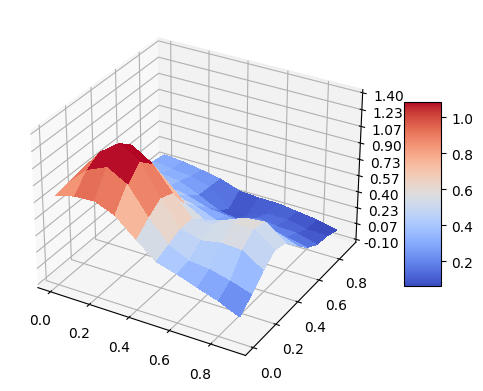

In [59]:
#Point b
#We buil our own FFNN using scikit learn, in order to compare the output with our own FFNN

#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Setting the random seed, obtaining always the same output for random generated variables
np.random.seed(2023)
#Generating our dataset, we choose to use the Franke Function.
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)
x, y = np.meshgrid(x,y)

#np.random.normal() adds noise to z with a normal distribution.
z = FrankeFunction(x, y) + 0.01*np.random.normal(0,1, x.shape)

#plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [60]:
x = x.reshape(-1,1) #reshaping the meshgrid in two arrays
y = y.reshape(-1,1)
z = z.reshape(-1,1)
X = np.hstack((x,y))
# Hold out some test data that is not used in training.
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

In [61]:
#we now define the MSE.
def MSE(y_data,y_model):
    n = np.size(y_model)
    y_data = y_data.reshape(-1,1)
    y_model = y_model.reshape(-1,1)
    return np.sum((y_data-y_model)**2)/n

In [62]:
#creating the model
model = MLPRegressor(hidden_layer_sizes=(10,),activation='logistic', alpha=0.005, learning_rate_init=0.013, max_iter=1000)

In [63]:
#learning
model.fit(X_train, z_train.ravel())

MLPRegressor(activation='logistic', alpha=0.005, hidden_layer_sizes=(10,),
             learning_rate_init=0.013, max_iter=1000)

In [64]:
#Prediction with test data
z_pred = model.predict(X_test)

In [65]:
#Evaluation of the model
mse = MSE(z_test, z_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.03019167333712299
